In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import utils_comp as utils
import utils_max_flow
import utils_centrality
import pickle

### Load data from 'N-k_CENTRALITY.ipynb' and 'N-k_MAX_FLOW.ipynb'

In [2]:
centrality_random_node_removal_df = pd.read_pickle('results/centrality/iggielgn/random_node_removal.pkl')
centrality_greedy_node_removal_df = pd.read_pickle('results/centrality/iggielgn/greedy_node_removal.pkl')

max_flow_random_node_removal_df = pd.read_pickle('results/max_flow/iggielgn/hybrid/random_node_removal_df.pkl')
max_flow_greedy_node_removal_df = pd.read_pickle('results/max_flow/iggielgn/hybrid/wfcr_node_removal_df.pkl')

centrality_random_edge_removal_df = pd.read_pickle('results/centrality/iggielgn/random_edge_removal.pkl')
centrality_greedy_edge_removal_df = pd.read_pickle('results/centrality/iggielgn/greedy_edge_removal.pkl')

max_flow_random_edge_removal_df = pd.read_pickle('results/max_flow/iggielgn/hybrid/random_edge_removal_df.pkl')
max_flow_greedy_edge_removal_df = pd.read_pickle('results/max_flow/iggielgn/hybrid/wfcr_edge_removal_df.pkl')

In [3]:
with open('graph_objects/G_simple_directed_iggielgn.pickle', 'rb') as f:
    G_simple_directed = pickle.load(f)
    G_simple_directed.name = 'G_simple_directed' 

# Direct comparison of index 

### Node

AUC for NPI: 14.92
NPI: [max ROC: 3.13695, avg ROC: 1.49694]

AUC for NPI: 27.6
NPI: [max ROC: 0.38893, avg ROC: 0.38342]

AUC for capacity_robustness_max_flow: 3.21
capacity_robustness_max_flow: [max ROC: 7.98174, avg ROC: 3.46102]

AUC for capacity_robustness_max_flow: 37.18
capacity_robustness_max_flow: [max ROC: 0.18666, avg ROC: 0.08303]



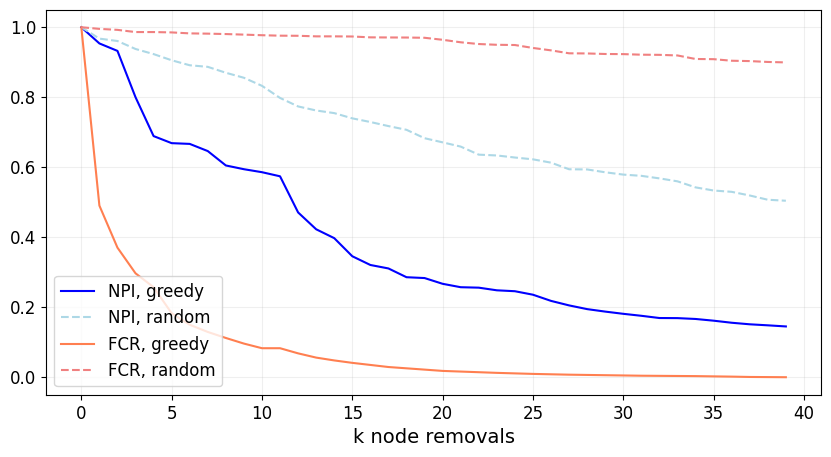

In [4]:
utils.plot_direct_comparison(centrality_greedy_node_removal_df, centrality_random_node_removal_df, max_flow_greedy_node_removal_df, max_flow_random_node_removal_df)

In [5]:
utils.common_entities(centrality_greedy_node_removal_df, max_flow_greedy_node_removal_df)

2 common entity removals
39 greedy entity removals before 'wfcr' reached 0 (limiting metric)

Variance of index differences of common entities: 16.0
Variance of index differences for random (averaged) node removal: 486777.0


,removed_entity,k_iteration [centrality],k_iteration [max_flow],abs_diff
0,SEQ_369__L_LMGN,16,2,14
1,N_193_M_LMGN,30,8,22


### Edge

AUC for NPI: 16.82
NPI: [max ROC: 3.68635, avg ROC: 1.57809]

AUC for NPI: 36.36
NPI: [max ROC: 0.30451, avg ROC: 0.21351]

AUC for capacity_robustness_max_flow: 5.22
capacity_robustness_max_flow: [max ROC: 4.54990, avg ROC: 1.94537]

AUC for capacity_robustness_max_flow: 48.48
capacity_robustness_max_flow: [max ROC: 0.29214, avg ROC: 0.12483]



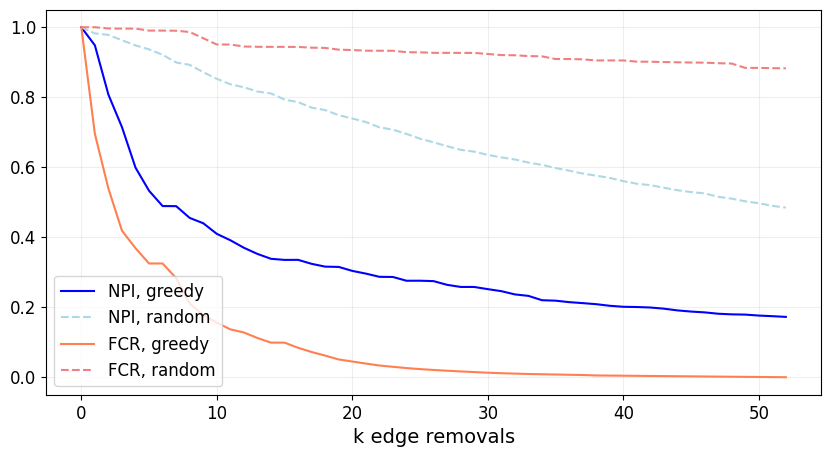

In [6]:
utils.plot_direct_comparison(centrality_greedy_edge_removal_df, centrality_random_edge_removal_df, max_flow_greedy_edge_removal_df, max_flow_random_edge_removal_df)

In [7]:
# Ignore SettingWithCopyWarning
pd.options.mode.chained_assignment = None

corrected_centrality_greedy_edge_removal_df = centrality_greedy_edge_removal_df.iloc[1:]
corrected_centrality_greedy_edge_removal_df['removed_entity'] = corrected_centrality_greedy_edge_removal_df['removed_entity'].apply(lambda edge: tuple(edge))
for i in range(len(corrected_centrality_greedy_edge_removal_df)):
    if corrected_centrality_greedy_edge_removal_df['removed_entity'].iloc[i] not in G_simple_directed.edges():
        corrected_centrality_greedy_edge_removal_df['removed_entity'].iloc[i] = (corrected_centrality_greedy_edge_removal_df['removed_entity'].iloc[i][1], corrected_centrality_greedy_edge_removal_df['removed_entity'].iloc[i][0])

corrected_max_flow_greedy_edge_removal_df = max_flow_greedy_edge_removal_df.iloc[1:]
corrected_max_flow_greedy_edge_removal_df['removed_entity'] = corrected_max_flow_greedy_edge_removal_df['removed_entity'].apply(lambda edge: tuple(edge))
for i in range(len(corrected_max_flow_greedy_edge_removal_df)):
    if corrected_max_flow_greedy_edge_removal_df['removed_entity'].iloc[i] not in G_simple_directed.edges():
        corrected_max_flow_greedy_edge_removal_df['removed_entity'].iloc[i] = (corrected_max_flow_greedy_edge_removal_df['removed_entity'].iloc[i][1], corrected_max_flow_greedy_edge_removal_df['removed_entity'].iloc[i][0])
        

In [8]:
utils.common_entities(corrected_centrality_greedy_edge_removal_df, corrected_max_flow_greedy_edge_removal_df)

4 common entity removals
51 greedy entity removals before 'wfcr' reached 0 (limiting metric)

Variance of index differences of common entities: 64.0
Variance of index differences for random (averaged) node removal: 72522.0


,removed_entity,k_iteration [centrality],k_iteration [max_flow],abs_diff
0,"(N_539_M_LMGN, SEQ_7053__M_LMGN)",12,10,2
1,"(SEQ_8285__L_LMGN, SEQ_2025__L_LMGN)",22,16,6
3,"(SEQ_369__L_LMGN, SEQ_373__L_LMGN)",10,3,7
2,"(SEQ_10361__M_LMGN, N_183_L_LMGN)",29,6,23


# Transformation between 'domains'

In [9]:
# Limit to 100 removed entities
centrality_greedy_node_removal_df = centrality_greedy_node_removal_df.iloc[:101]
centrality_greedy_edge_removal_df = centrality_greedy_edge_removal_df.iloc[:101]

In [10]:
centrality_greedily_removed_nodes_lst = centrality_greedy_node_removal_df['removed_entity'].dropna().tolist()
max_flow_greedily_removed_nodes_lst = max_flow_greedy_node_removal_df['removed_entity'].dropna().tolist()

centrality_greedily_removed_edges_lst = centrality_greedy_edge_removal_df['removed_entity'].dropna().tolist()
max_flow_greedily_removed_edges_lst = max_flow_greedy_edge_removal_df['removed_entity'].dropna().tolist()

In [11]:
# Correct directionality of edges
centrality_greedily_removed_edges_lst = utils.correct_edges([tuple(e) for e in centrality_greedily_removed_edges_lst])
max_flow_greedily_removed_edges_lst = utils.correct_edges([tuple(e) for e in max_flow_greedily_removed_edges_lst])

### Max flow based N-k analysis employing greedy entity removal order resulting from centrality analysis

In [12]:
#centrality_greedily_removed_nodes_max_flow_df = utils_max_flow.flow_capacity_robustness(G_simple_directed, heuristic='greedy_centrality', remove='node', greedy_centrality_lst=centrality_greedily_removed_nodes_lst)
#centrality_greedily_removed_nodes_max_flow_df.to_pickle('results/comparison/centrality_greedily_removed_nodes_max_flow_df.pkl')
centrality_greedily_removed_nodes_max_flow_df = pd.read_pickle('results/comparison/centrality_greedily_removed_nodes_max_flow_df.pkl')
centrality_greedily_removed_nodes_max_flow_df

,max_flow_value,capacity_robustness_max_flow,heuristic,removed_entity
0,75679.799782,1.000000,NaN,NaN
1,71465.609509,0.944316,greedy_centrality,LKD_N_133
2,66889.062428,0.883843,greedy_centrality,LKD_N_94
3,63870.573908,0.846708,greedy_centrality,N_2631_S_LMGN
4,56165.768107,0.744569,greedy_centrality,LKD_N_97
...,...,...,...,...
96,3037.478855,0.040556,greedy_centrality,N_63_L_LMGN
97,3037.478855,0.040556,greedy_centrality,N_791_S_LMGN
98,3037.478855,0.040556,greedy_centrality,SEQ_1291__L_LMGN
99,3037.478855,0.040585,greedy_centrality,LKD_N_411


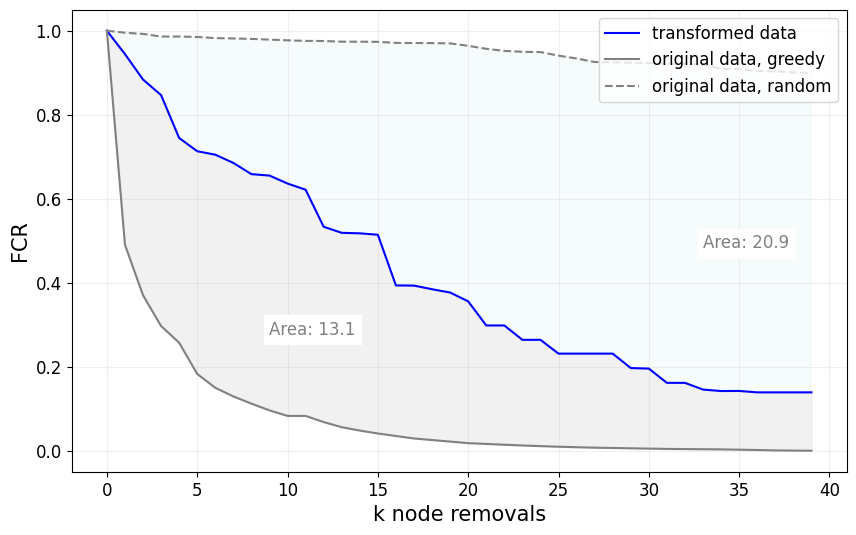

<Figure size 640x480 with 0 Axes>

In [13]:
fig = utils.plot_transform_comparison(centrality_greedily_removed_nodes_max_flow_df, max_flow_greedy_node_removal_df, max_flow_random_node_removal_df, 'capacity_robustness_max_flow')
plt.savefig('saved_plots/iggielgn/hybrid/comparison/FCR_using_greedy_nodes_NPI.png', bbox_inches='tight', pad_inches=0)

In [20]:
#centrality_greedily_removed_edges_max_flow_df = utils_max_flow.flow_capacity_robustness(G_simple_directed, heuristic='greedy_centrality', remove='edge', greedy_centrality_lst=centrality_greedily_removed_edges_lst)
#centrality_greedily_removed_edges_max_flow_df.to_pickle('results/comparison/centrality_greedily_removed_edges_max_flow_df.pkl')
centrality_greedily_removed_edges_max_flow_df = pd.read_pickle('results/comparison/centrality_greedily_removed_edges_max_flow_df.pkl')
centrality_greedily_removed_edges_max_flow_df.head(30)

,max_flow_value,capacity_robustness_max_flow,heuristic,removed_entity
0,75679.799782,1.000000,NaN,NaN
1,71721.605312,0.947698,greedy_centrality,"{LKD_N_158, LKD_N_148}"
2,65263.241387,0.862360,greedy_centrality,"{SEQ_10405__S_LMGN, N_161_L_LMGN}"
3,62076.141718,0.820247,greedy_centrality,"{N_731_M_LMGN, N_730_M_LMGN}"
4,58729.924497,0.776032,greedy_centrality,"{SEQ_5193__L_LMGN, SEQ_5183__L_LMGN}"
5,54901.826656,0.725449,greedy_centrality,"{LKD_N_118, LKD_N_137}"
6,48218.713930,0.637141,greedy_centrality,"{LKD_N_507, LKD_N_508}"
7,47882.702651,0.632701,greedy_centrality,"{N_238_L_LMGN, SEQ_889__L_LMGN}"
8,47122.240784,0.622653,greedy_centrality,"{SEQ_5947__L_LMGN, N_238_L_LMGN}"
9,47122.240784,0.622653,greedy_centrality,"{LKD_N_59, LKD_N_58}"


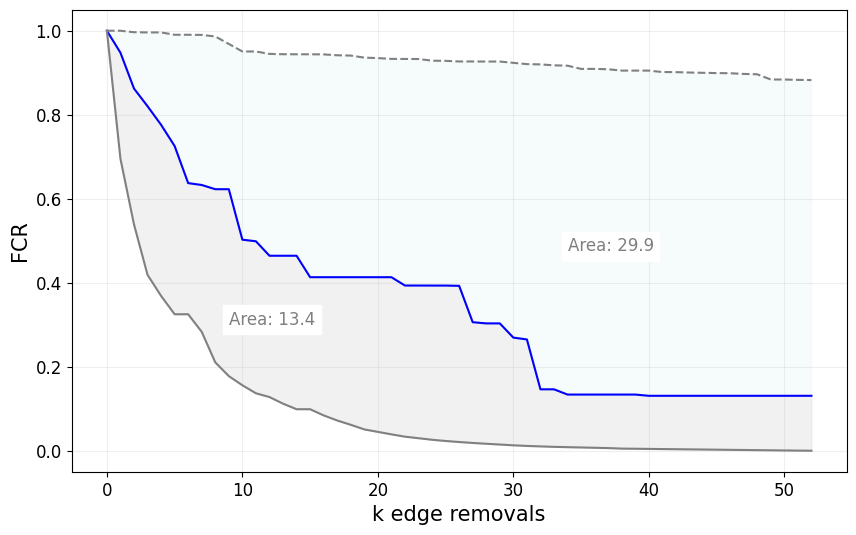

<Figure size 640x480 with 0 Axes>

In [15]:
fig = utils.plot_transform_comparison(centrality_greedily_removed_edges_max_flow_df, max_flow_greedy_edge_removal_df, max_flow_random_edge_removal_df, 'capacity_robustness_max_flow')
plt.savefig('saved_plots/iggielgn/hybrid/comparison/FCR_using_greedy_edges_NPI.png', bbox_inches='tight', pad_inches=0)

### Centrality based N-k analysis employing greedy entity removal order resulting from max flow analysis

In [16]:
# max_flow_greedily_removed_nodes_centrality_df = utils_centrality.n_minus_k(G_simple_directed, heuristic='max_flow', remove='node', greedy_max_flow_lst=max_flow_greedily_removed_nodes_lst)
# max_flow_greedily_removed_nodes_centrality_df.to_pickle('results/comparison/max_flow_greedily_removed_nodes_centrality_df.pkl')
max_flow_greedily_removed_nodes_centrality_df = pd.read_pickle('results/comparison/max_flow_greedily_removed_nodes_centrality_df.pkl')
max_flow_greedily_removed_nodes_centrality_df

,iteration,removed_entity,NPI,connectedness,reach,connectivity,heuristic
0,0.0,NaN,1.000000,1.000000,1.000000,1.000000,NaN
1,1.0,NO_N_17,0.853436,0.875745,0.956960,1.018356,max_flow
2,2.0,SEQ_369__L_LMGN,0.822799,0.870174,0.956746,0.988304,max_flow
3,3.0,N_791_S_LMGN,0.721936,0.860418,0.956533,0.877180,max_flow
4,4.0,N_272_M_LMGN,0.716011,0.860479,0.956320,0.870114,max_flow
5,5.0,SEQ_2285_p,0.689433,0.829625,0.955689,0.869549,max_flow
6,6.0,N_553_M_LMGN,0.687351,0.829203,0.955476,0.867557,max_flow
7,7.0,N_248_L_LMGN,0.632379,0.771851,0.947367,0.864820,max_flow
8,8.0,N_193_M_LMGN,0.594240,0.744689,0.946741,0.842861,max_flow
9,9.0,SEQ_7797__M_LMGN,0.574999,0.721309,0.946115,0.842562,max_flow


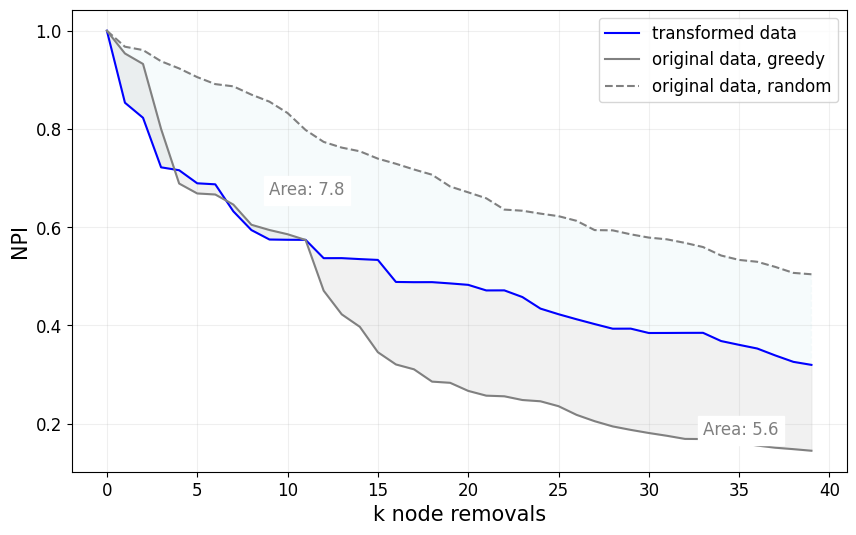

<Figure size 640x480 with 0 Axes>

In [17]:
fig = utils.plot_transform_comparison(max_flow_greedily_removed_nodes_centrality_df, centrality_greedy_node_removal_df, centrality_random_node_removal_df, 'NPI')
plt.savefig('saved_plots/iggielgn/hybrid/comparison/NPI_using_greedy_nodes_FCR.png', bbox_inches='tight', pad_inches=0)

In [18]:
# max_flow_greedily_removed_edges_centrality_df = utils_centrality.n_minus_k(G_simple_directed, heuristic='max_flow', remove='edge', greedy_max_flow_lst=max_flow_greedily_removed_edges_lst)
# max_flow_greedily_removed_edges_centrality_df.to_pickle('results/comparison/max_flow_greedily_removed_edges_centrality_df.pkl')
max_flow_greedily_removed_edges_centrality_df = pd.read_pickle('results/comparison/max_flow_greedily_removed_edges_centrality_df.pkl')
max_flow_greedily_removed_edges_centrality_df

,iteration,removed_entity,NPI,connectedness,reach,connectivity,heuristic
0,0.0,NaN,1.000000,1.000000,1.000000,1.000000,NaN
1,1.0,"{NO_N_17, SEQ_2285_p}",0.984060,1.000000,0.985077,0.998967,max_flow
2,2.0,"{N_791_S_LMGN, SEQ_8387__L_LMGN}",0.867160,0.989229,0.985077,0.889881,max_flow
3,3.0,"{SEQ_373__L_LMGN, SEQ_369__L_LMGN}",0.833310,0.982933,0.985077,0.860621,max_flow
4,4.0,"{SEQ_444_p, SEQ_8163__M_LMGN}",0.724328,0.976437,0.985077,0.753045,max_flow
5,5.0,"{NO_N_17, N_47_NS_LMGN}",0.688067,0.927285,0.964879,0.769033,max_flow
6,6.0,"{N_183_L_LMGN, SEQ_10361__M_LMGN}",0.687978,0.927285,0.964879,0.768933,max_flow
7,7.0,"{N_684_M_LMGN, SEQ_7668_p}",0.681187,0.927285,0.964879,0.761343,max_flow
8,8.0,"{SEQ_2285_p, LKD_N_164}",0.653648,0.891232,0.964065,0.760759,max_flow
9,9.0,"{N_553_M_LMGN, SEQ_10079__M_LMGN}",0.651702,0.890720,0.964065,0.758930,max_flow


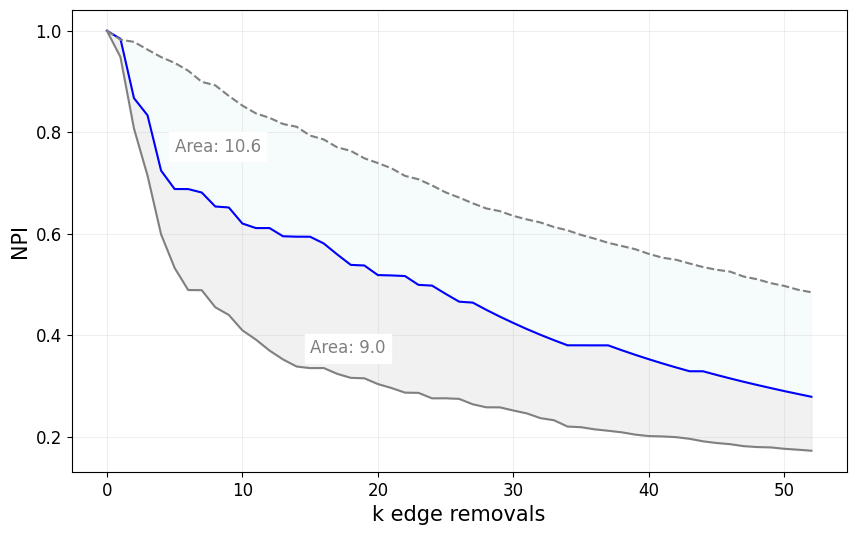

<Figure size 640x480 with 0 Axes>

In [19]:
fig = utils.plot_transform_comparison(max_flow_greedily_removed_edges_centrality_df, centrality_greedy_edge_removal_df, centrality_random_edge_removal_df, 'NPI')
plt.savefig('saved_plots/iggielgn/hybrid/comparison/NPI_using_greedy_edges_FCR.png', bbox_inches='tight', pad_inches=0)